In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Step 1 - First we will clean the data

In [38]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [39]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [40]:
df.columns  = ['Month','Milk in pounds for Cow']

In [41]:
df.tail()

,Month,Milk in pounds for Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [42]:
df.drop(168,axis=0,inplace=True)

In [43]:
df.tail()

,Month,Milk in pounds for Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [44]:
df['Month'] = pd.to_datetime(df['Month'])

In [45]:
df.head()

,Month,Milk in pounds for Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [46]:
df.set_index('Month',inplace=True)

In [47]:
df.head()

,Milk in pounds for Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [48]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=168, freq=None)

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds for Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [50]:
#Step2 - We will visualize the data now

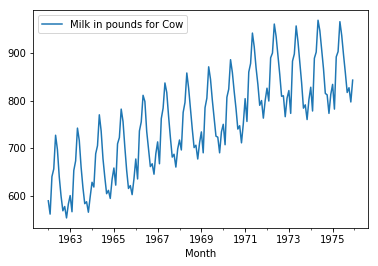

In [51]:
df.plot()

In [52]:
time_series = df['Milk in pounds for Cow']

In [53]:
type(time_series)

pandas.core.series.Series

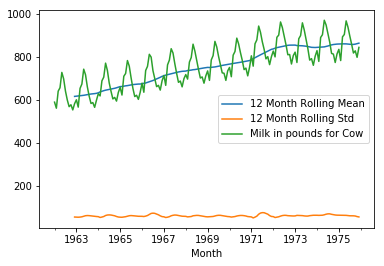

In [54]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [55]:
# Now let us check the ETS decomposition plot (Trend, Seasonallity and Residual)

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
decomp = seasonal_decompose(time_series)

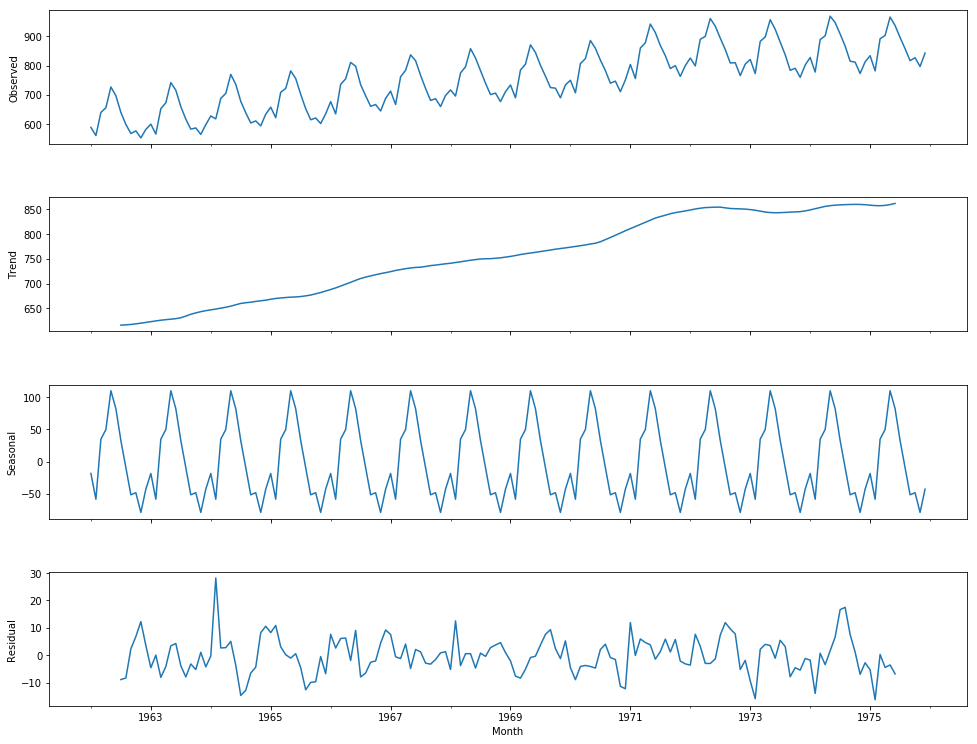

In [65]:
fig = decomp.plot()
fig.set_size_inches(15,12)

We will do some mathematics now: (Augmented Dickey–Fuller test).
Through this we can check whether the time series is sationary or not. We will check this through the p value.If p value is small, lets say p < 0.5: reject the null hypothesis, which means time series is stationary.

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
result = adfuller(df['Milk in pounds for Cow'])

In [61]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistics','p-value','# of lags','Num of Observations']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [62]:
adf_check(df['Milk in pounds for Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistics : -1.3038115874221248
p-value : 0.6274267086030337
# of lags : 13
Num of Observations : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [66]:
df['First Difference'] = df['Milk in pounds for Cow'] - df['Milk in pounds for Cow'].shift(1)

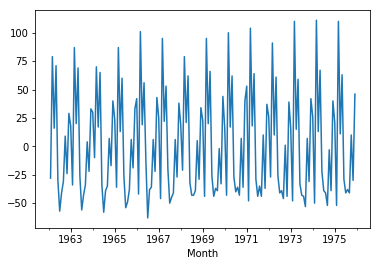

In [67]:
df['First Difference'].plot()

In [69]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -3.05499555865311
p-value : 0.030068004001782334
# of lags : 14
Num of Observations : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [70]:
#So we successfully made our time series stationary. If this wasn't enough, we would have done a second differencing on this.

In [71]:
#Seasonal Difference:

In [72]:
df['Seasonal Difference'] = df['Milk in pounds for Cow'] - df['Milk in pounds for Cow'].shift(12)

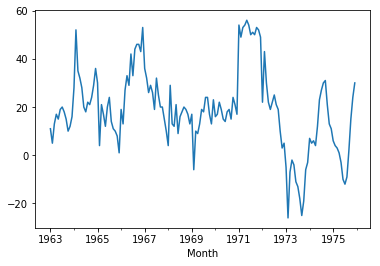

In [73]:
df['Seasonal Difference'].plot()

In [74]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -2.335419314359397
p-value : 0.16079880527711382
# of lags : 12
Num of Observations : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


**It seems that variance start to increase if we go further in time. In this case we can check for seasonal first difference.**

In [75]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

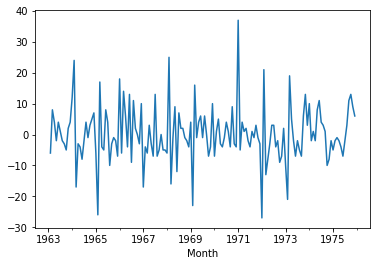

In [76]:
df['Seasonal First Difference'].plot()

In [77]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -5.038002274921979
p-value : 1.865423431878876e-05
# of lags : 11
Num of Observations : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [78]:
#Step 4: We will now create ACF and PACF plots.

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

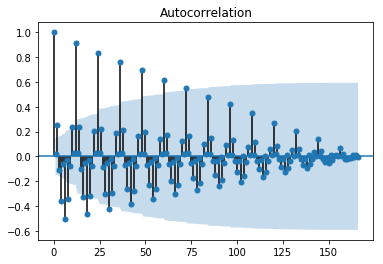

In [88]:
fig_first = plot_acf(df['First Difference'].dropna())

In [ ]:
#This is an example of gradual decline.

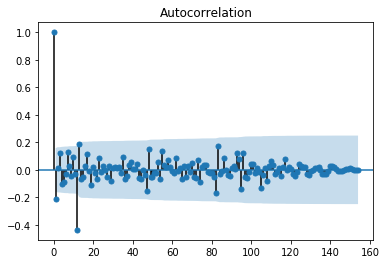

In [82]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [83]:
#There is a sharp drop off and this is a popular auto correlation plot to see.

In [84]:
#We can do this using pandas also, but only for acf and not pacf

In [85]:
from pandas.plotting import autocorrelation_plot

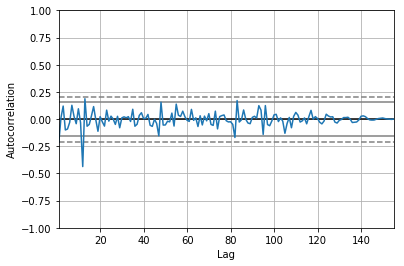

In [86]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())


If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag.If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using  MA terms.

This will allow us to decide what actual values of p,d and q to provide for our ARIMA model.

p --> # of lag observations<br>
d --> # of times that raw observations are differenced <br>
q --> the size of the moving average window, also called the order of moving average <br>

Now we will plot a pacf. In general, a partial correlation is a conditional correlation.

**It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.**

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.


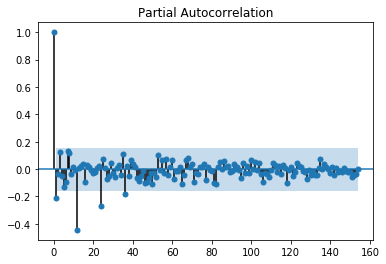

In [89]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

In [90]:
#We will create our final acf and pacf plots for referring to our ARIMA model:

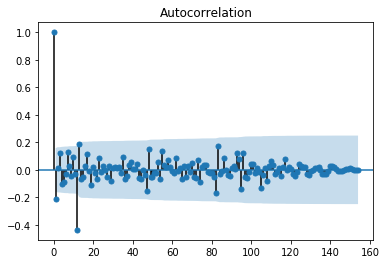

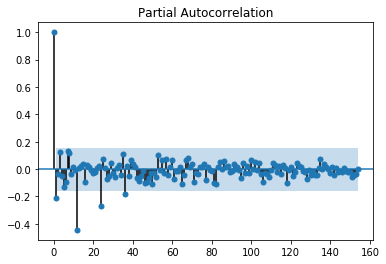

In [92]:
plot_acf(df['Seasonal First Difference'].dropna());
plot_pacf(df['Seasonal First Difference'].dropna());

In [93]:
#Step 5: Now since our data is seasonal, we will apply seasonal ARIMA.

In [94]:
from statsmodels.tsa.arima_model import ARIMA

In [95]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [96]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds for Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [97]:
results = model.fit()

In [99]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds for Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Mon, 05 Mar 2018   AIC                           1074.131
Time:                                    16:59:12   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

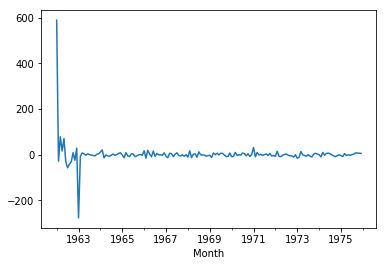

In [101]:
results.resid.plot()

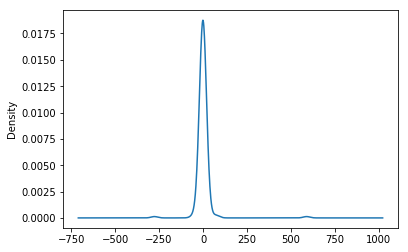

In [103]:
results.resid.plot(kind='kde')

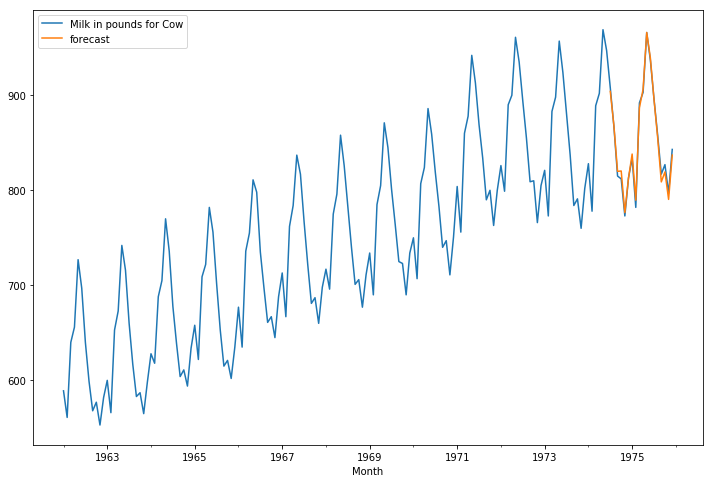

In [120]:
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in pounds for Cow','forecast']].plot(figsize=(12,8))

In [121]:
df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,2.0,11.0,808.841269
1975-10-01,827.0,10.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,24.0,9.0,790.427501
1975-12-01,843.0,46.0,30.0,6.0,837.063646


In [122]:
from pandas.tseries.offsets import DateOffset

In [123]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [124]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [126]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [127]:
future_df

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN


In [128]:
final_df = pd.concat([df,future_df])

In [130]:
final_df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


In [131]:
final_df['forecast'] = results.predict(starts=168,end=192)

In [133]:
final_df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,951.525751
1977-08-01,NaN,NaN,NaN,NaN,911.918840
1977-09-01,NaN,NaN,NaN,NaN,865.881040
1977-10-01,NaN,NaN,NaN,NaN,871.027161
1977-11-01,NaN,NaN,NaN,NaN,836.962872


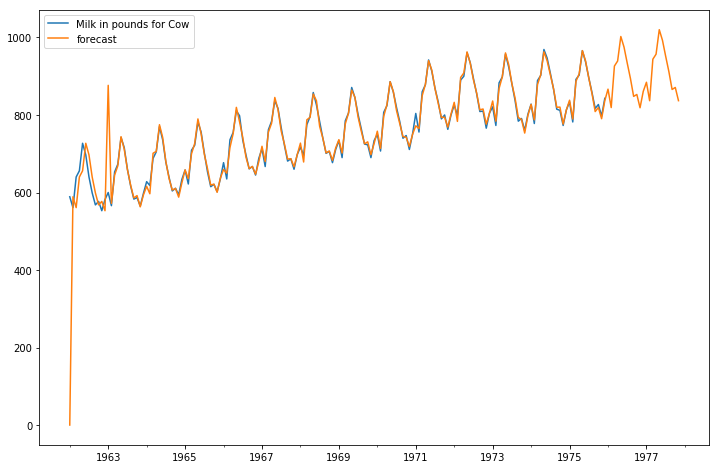

In [138]:
final_df[['Milk in pounds for Cow','forecast']].plot(figsize=(12,8))

**We have successfully forecasted for next 2 years and seems that it fits in well.**